# I Solving the Sum of Two Digits Programming Challenge

## C ++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

^C


### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

4 5
9


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

5
5 65 84 2 63
5460


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 10 32

Overwriting input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

320


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

320
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
%%writefile write20Random.cpp
#include <iostream>
#include <fstream>
#include <cstdlib>
#include <vector>
#include <algorithm>

using namespace std;

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

long long MaxPairwiseProductLong(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    long n;
    for (int j=0;j<20;j++){
        n =rand() % 18 +2;
        std::cout << n << "\n";
        std::vector<int> numbers(n);
        long x;
        for (int i=0;i<n;i++){
            x = rand() % 100000;
            numbers.push_back(x);
            std::cout << x << " ";
        }
        std::cout << "\n";
        long long res1 = MaxPairwiseProduct(numbers);
        long long res2 = MaxPairwiseProductLong(numbers);
        if (res1 != res2){
            std::cout << "Wrong Answer: " << res1 << " " << res2 << "\n";
        }
        else {
            std::cout << "Ok\n";
        }

    }
}


Overwriting write20Random.cpp


In [ ]:
!g++ write20Random.cpp -o write20Random
!./write20Random

3
30886 92777 36915 
Wrong Answer: 1140156690 3424862955
7
38335 85386 60492 16649 41421 2362 90027 
Wrong Answer: 1587874035 7687045422
16
20059 97763 13926 80540 83426 89172 55736 5211 95368 2567 56429 65782 21530 22862 65123 74067 
Wrong Answer: 2136078370 9323461784
3
13929 79802 34022 
Wrong Answer: 1111562058 2715023644
14
33069 98167 61393 18456 75011 78042 76229 77373 84421 44919 13784 98537 75198 94324 
Wrong Answer: 2140361113 9673081679
13
64370 66413 3526 76091 68980 59956 41873 6862 99170 6996 97281 2305 20925 
Wrong Answer: 2088605604 9647356770
16
36327 60336 26505 50846 21729 61313 25857 16124 53895 19582 545 98814 33367 15434 90364 44043 
Wrong Answer: 2147129406 8929228296
16
71087 26808 17276 47178 95788 93584 5403 2651 92754 12399 99932 95060 49676 93368 47739 10012 
Wrong Answer: 1905700296 9572286416
18
98586 48094 97539 40795 80570 51434 60378 97467 66601 10097 12902 73317 70492 26652 60756 97301 60280 24286 
Wrong Answer: 2147351640 9615979854
3
53865 29689 2844

### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000

real	2m9.589s
user	2m9.179s
sys	0m0.032s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                     //1                                                                                                              //1
    std::vector<int> numbers(n);       //n                                     
    for (int i = 0; i < n; ++i) {      //n                                     
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";              //1         
    return 0;                       //1                                       
}  

Overwriting test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
1
1
1
1
1
1
1
1
0
276
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

In [ ]:
%%writefile max_pairwise_product_efficient.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProductEfficient(const std::vector<int>& numbers) {
    int n = numbers.size();
    int max_index1 = -1;
    for (int i = 0; i < n; ++i) {   //n
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1])){
          max_index1 = i;
        }
    }
    int max_index2 = -1; //1
    for (int j = 0; j < n; ++j) {   //n
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))){
          max_index2 = j;
        }
    }
    return ((long long) (numbers[max_index1])) * numbers[max_index2];;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProductEfficient(numbers) << "\n";
    return 0;
}

Overwriting max_pairwise_product_efficient.cpp


Add in each line a coment with the number of intstrcution that are executed in that line

Test with inputs 1 and 2

In [ ]:
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!./max_pairwise_product_efficient < input1.txt
!./max_pairwise_product_efficient < input2.txt

320
40000000000


Test and time it with input 3

In [ ]:
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input3.txt

39999800000

real	0m0.063s
user	0m0.058s
sys	0m0.006s


20 stress tests

In [ ]:
%%writefile write20RandomEfficient.cpp
#include <iostream>
#include <fstream>
#include <cstdlib>
#include <vector>
#include <algorithm>

long long MaxPairwiseProductLong(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

long long MaxPairwiseProductEfficient(const std::vector<int>& numbers) {
    int n = numbers.size();
    int max_index1 = -1;
    for (int i = 0; i < n; ++i) {   //n
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1])){
          max_index1 = i;
        }
    }
    int max_index2 = -1; //1
    for (int j = 0; j < n; ++j) {   //n
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))){
          max_index2 = j;
        }
    }
    return ((long long) (numbers[max_index1])) * numbers[max_index2];;
}

int main() {
    long n;
    for (int j=0;j<20;j++){
        n =rand() % 18 +2;
        std::cout << n << "\n";
        std::vector<int> numbers(n);
        long x;
        for (int i=0;i<n;i++){
            x = rand() % 100000;
            numbers.push_back(x);
            std::cout << x << " ";
        }
        std::cout << "\n";
        long long res1 = MaxPairwiseProductLong(numbers);
        long long res2 = MaxPairwiseProductEfficient(numbers);
        if (res1 != res2){
            std::cout << "Wrong Answer: " << res1 << " " << res2 << "\n";
        }
        else {
            std::cout << "Ok\n";
        }

    }
}

Overwriting write20RandomEfficient.cpp


In [ ]:
!g++ write20RandomEfficient.cpp -o write20RandomEfficient
!./write20RandomEfficient

3
30886 92777 36915 
Ok
7
38335 85386 60492 16649 41421 2362 90027 
Ok
16
20059 97763 13926 80540 83426 89172 55736 5211 95368 2567 56429 65782 21530 22862 65123 74067 
Ok
3
13929 79802 34022 
Ok
14
33069 98167 61393 18456 75011 78042 76229 77373 84421 44919 13784 98537 75198 94324 
Ok
13
64370 66413 3526 76091 68980 59956 41873 6862 99170 6996 97281 2305 20925 
Ok
16
36327 60336 26505 50846 21729 61313 25857 16124 53895 19582 545 98814 33367 15434 90364 44043 
Ok
16
71087 26808 17276 47178 95788 93584 5403 2651 92754 12399 99932 95060 49676 93368 47739 10012 
Ok
18
98586 48094 97539 40795 80570 51434 60378 97467 66601 10097 12902 73317 70492 26652 60756 97301 60280 24286 
Ok
3
53865 29689 28444 
Ok
7
58440 44729 58031 8117 38097 5771 34481 
Ok
13
20709 98927 4567 77856 79497 72353 54586 76965 55306 64683 6219 28624 51528 
Ok
5
5732 48829 9503 30019 58270 
Ok
2
59708 86715 
Ok
6
18149 47796 723 42618 2245 22846 
Ok
17
92921 43555 92379 97488 37764 88228 69841 92350 65193 41500 57034 87

Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile max_pairwise_product_efficient_execin.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int b;
long long MaxPairwiseProductEfficient(const std::vector<int>& numbers) {
    int n = numbers.size();
    b++;
    int max_index1 = -1;
    b++;
    b++;
    for (int i = 0; i < n; ++i) {   //n
        b+=2;
        b++;
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1])){
          max_index1 = i;
          b++;
        }
    }
    int max_index2 = -1; //1
    b++;
    b++;
    for (int j = 0; j < n; ++j) {   //n
        b+=2;
        b++;
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))){
          max_index2 = j;
          b++;
        }
    }
    return ((long long) (numbers[max_index1])) * numbers[max_index2]; 
}

int main() {
    int n;
    b++;
    std::cin >> n;
    b++;
    std::vector<int> numbers(n);
    b+=n;
    b++;
    for (int i = 0; i < n; ++i) {
        b+=2;
        std::cin >> numbers[i];
        b++;
    }
    long long result = MaxPairwiseProductEfficient(numbers);
    b++;
    std::cout << "\n"<< b << "\n";
    
    return 0;
}

Overwriting max_pairwise_product_efficient_execin.cpp


Calculate estimated time by instruction and number of instructions by second

In [ ]:
!g++ max_pairwise_product_efficient_execin.cpp -o max_pairwise_product_efficient_execin
!time ./max_pairwise_product_efficient_execin < input1.txt
!time ./max_pairwise_product_efficient_execin < input2.txt
!time ./max_pairwise_product_efficient_execin < input3.txt


128

real	0m0.003s
user	0m0.003s
sys	0m0.000s

76

real	0m0.004s
user	0m0.003s
sys	0m0.000s

2400008

real	0m0.065s
user	0m0.062s
sys	0m0.002s


### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [ ]:
%%writefile max_pairwise_product_superefficient.cpp
#include <iostream>
#include <vector>
#include <string>
using namespace std;

int main() {
	int n;
	cin >> n;
	long first = 0, second = 0;
	cin >> first;
	cin >> second;
  long x;
	for (int i = 0; i < n-2; i++)
	{	
		cin >> x;
    if (x>=first){
      second=first;
			first=x;
				
		}
		else if(x>second){
			second= x;
		}
  
		
	}

	cout << first*second << endl;
	
	return 0;
}

Overwriting max_pairwise_product_superefficient.cpp


Test with inputs 1 and 2


 

In [ ]:
!g++ max_pairwise_product_superefficient.cpp -o max_pairwise_product_superefficient
!./max_pairwise_product_superefficient < input1.txt
!./max_pairwise_product_superefficient < input2.txt

320
40000000000


Test and time it with input 3

In [ ]:
!time ./max_pairwise_product_superefficient < input3.txt

39999800000

real	0m0.057s
user	0m0.056s
sys	0m0.001s


20 stress tests 

In [ ]:
%%writefile write20RandomSuperEfficient.cpp
#include <iostream>
#include <fstream>
#include <cstdlib>
#include <vector>
#include <algorithm>

long long MaxPairwiseProductEfficient(const std::vector<int>& numbers) {
    int n = numbers.size();
    int max_index1 = -1;
    for (int i = 0; i < n; ++i) {   //n
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1])){
          max_index1 = i;
        }
    }
    int max_index2 = -1; //1
    for (int j = 0; j < n; ++j) {   //n
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))){
          max_index2 = j;
        }
    }
    return ((long long) (numbers[max_index1])) * numbers[max_index2];;
}

long long MaxPairwiseProductSuperEfficient(const std::vector<int>& numbers) {
    long n = numbers.size();
    long first = 0, second = 0;
    first = numbers[0];
    second = numbers[1];
    long x;
    for (int i = 0; i < n-2; i++)
    {	
      x = numbers[i+2];
      if (x>=first){
        second=first;
        first=x;
          
      }
      else if(x>second){
        second= x;
      }
    
      
    }

    return first*second;
}

int main() {
    long n;
    for (int j=0;j<20;j++){
        n =rand() % 18 +2;
        std::cout << n << "\n";
        std::vector<int> numbers(n);
        long x;
        for (int i=0;i<n;i++){
            x = rand() % 100000;
            numbers.push_back(x);
            std::cout << x << " ";
        }
        std::cout << "\n";
        long long res1 = MaxPairwiseProductEfficient(numbers);
        long long res2 = MaxPairwiseProductSuperEfficient(numbers);
        if (res1 != res2){
            std::cout << "Wrong Answer: " << res1 << " " << res2 << "\n";
        }
        else {
            std::cout << "Ok\n";
        }

    }
}

Overwriting write20RandomSuperEfficient.cpp


In [ ]:
!g++ write20RandomSuperEfficient.cpp -o write20RandomSuperEfficient
!./write20RandomSuperEfficient

3
30886 92777 36915 
Ok
7
38335 85386 60492 16649 41421 2362 90027 
Ok
16
20059 97763 13926 80540 83426 89172 55736 5211 95368 2567 56429 65782 21530 22862 65123 74067 
Ok
3
13929 79802 34022 
Ok
14
33069 98167 61393 18456 75011 78042 76229 77373 84421 44919 13784 98537 75198 94324 
Ok
13
64370 66413 3526 76091 68980 59956 41873 6862 99170 6996 97281 2305 20925 
Ok
16
36327 60336 26505 50846 21729 61313 25857 16124 53895 19582 545 98814 33367 15434 90364 44043 
Ok
16
71087 26808 17276 47178 95788 93584 5403 2651 92754 12399 99932 95060 49676 93368 47739 10012 
Ok
18
98586 48094 97539 40795 80570 51434 60378 97467 66601 10097 12902 73317 70492 26652 60756 97301 60280 24286 
Ok
3
53865 29689 28444 
Ok
7
58440 44729 58031 8117 38097 5771 34481 
Ok
13
20709 98927 4567 77856 79497 72353 54586 76965 55306 64683 6219 28624 51528 
Ok
5
5732 48829 9503 30019 58270 
Ok
2
59708 86715 
Ok
6
18149 47796 723 42618 2245 22846 
Ok
17
92921 43555 92379 97488 37764 88228 69841 92350 65193 41500 57034 87

Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
%%writefile max_pairwise_product_superefficient_execin.cpp
#include <iostream>
#include <vector>
#include <string>
using namespace std;

int main() {
  int b = 0;
	int n;
  b++;
	cin >> n;
  b++;
	long first = 0, second = 0;
  b+=2;
	cin >> first;
  b++;
	cin >> second;
  b++;
  long x;
  b++;
  b++;
	for (int i = 0; i < n-2; i++)
	{	
    b+=2;
		cin >> x;
    b++;
    b++;
    b++;
    if (x>=first){
      second=first;
      b++;
			first=x;
      b++;
				
		}
		else if(x>second){
			second= x;
      b++;
		}
	}

	long long a = first*second;
  b++;
  cout << "\n"<< b << "\n";
	
	return 0;
}

Overwriting max_pairwise_product_superefficient_execin.cpp


Calculate estimated time by instruction and number of instructions by second

In [ ]:
!g++ max_pairwise_product_superefficient_execin.cpp -o max_pairwise_product_superefficient_execin
!time ./max_pairwise_product_superefficient_execin < input1.txt
!time ./max_pairwise_product_superefficient_execin < input2.txt
!time ./max_pairwise_product_superefficient_execin < input3.txt


65

real	0m0.004s
user	0m0.001s
sys	0m0.003s

34

real	0m0.005s
user	0m0.003s
sys	0m0.001s

1399995

real	0m0.057s
user	0m0.055s
sys	0m0.002s


## Python

Efficient cython file reading, string parsing, and array building

https://stackoverflow.com/questions/37219875/efficient-cython-file-reading-string-parsing-and-array-building



File PreProcessing With C and Cython

https://github.com/EveryTimeIWill18/Cython_Repo/blob/master/FastFileProcessingWithCython.ipynb



In [ ]:
n = int(input())
matriz = [int(x) for x in input().split()]

max1=max(matriz[0],matriz[1])
max2=min(matriz[0],matriz[1])

if n>2:
    for i in range(n-2):
        b= matriz[i+2]
        if (b>max2 and b<=max1):
            max2=b
        if (b>max1):
            max2=max1
            max1=b
        
print(max1*max2)

5
5 6 5 8 232
1856


In [ ]:
%%writefile input1.txt
3
20 28 10

Writing input1.txt


In [ ]:
%%writefile output1.txt
560

Writing output1.txt


In [ ]:
%%writefile input2.txt
10
1 2 3 4 5 6 7 8 10 32

Writing input2.txt


In [ ]:
%%writefile output2.txt
320

Writing output2.txt


In [ ]:
%%writefile max_pairwise_product.py
# python3
def max_pairwise_product(numbers):
    n = len(numbers)
    max_product = 0
    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product,
                numbers[first] * numbers[second])

    return max_product


if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product(input_numbers))

Writing max_pairwise_product.py


In [ ]:
!python max_pairwise_product.py

10
1 2 3 4 5 6 7 8 10 32
320


In [ ]:
!python max_pairwise_product.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python max_pairwise_product.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python max_pairwise_product.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

In [ ]:
%%writefile max_pairwise_product_efficient.py
def max_pairwise_product(numbers):
    n = len(numbers)
    max_index1 = -1
    for i in range(n):
        if (max_index1 == -1) or (numbers[i] > numbers[max_index1]):
            max_index1 = i
    max_index2 = -1
    for j in range(n):
        if (j != max_index1) and (max_index2 == -1 or numbers[j] > numbers[max_index2]):
            max_index2 = j
    return numbers[max_index1]*numbers[max_index2]


if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product(input_numbers))


Writing max_pairwise_product_efficient.py


In [ ]:
!python max_pairwise_product.py

10
1 2 3 4 5 6 7 8 10 32
320


In [ ]:
!python max_pairwise_product.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python max_pairwise_product.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# Screenhsoots of the Coursera Submissions in C++ and Python

![AplasB](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Lab6/AplusB.jpg)

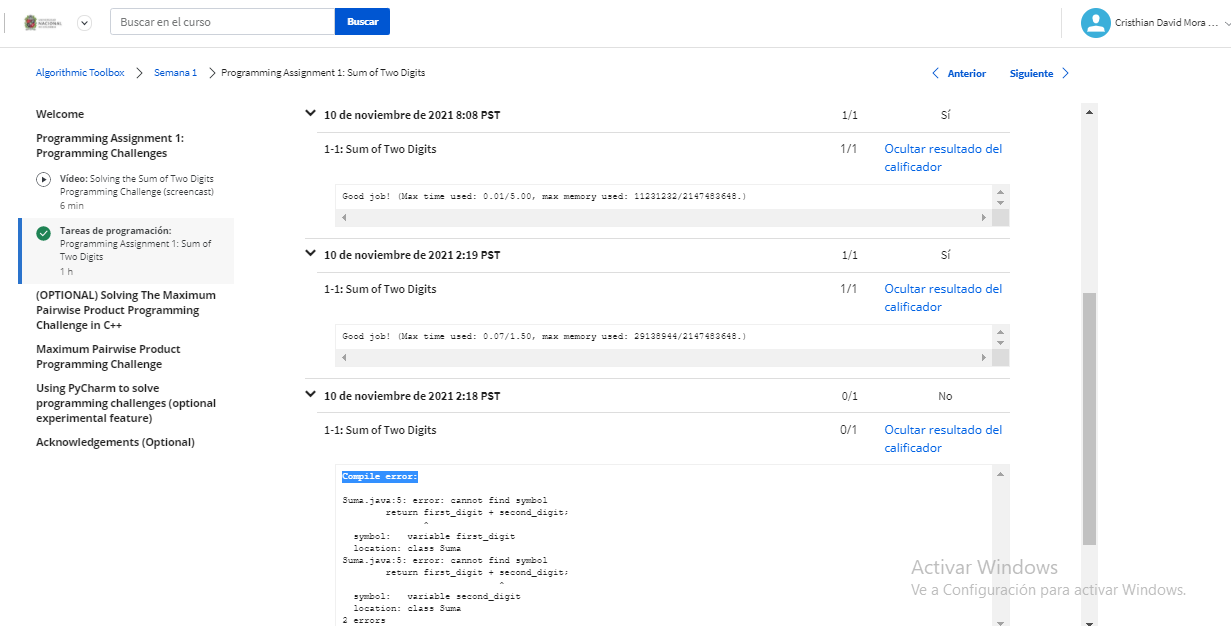

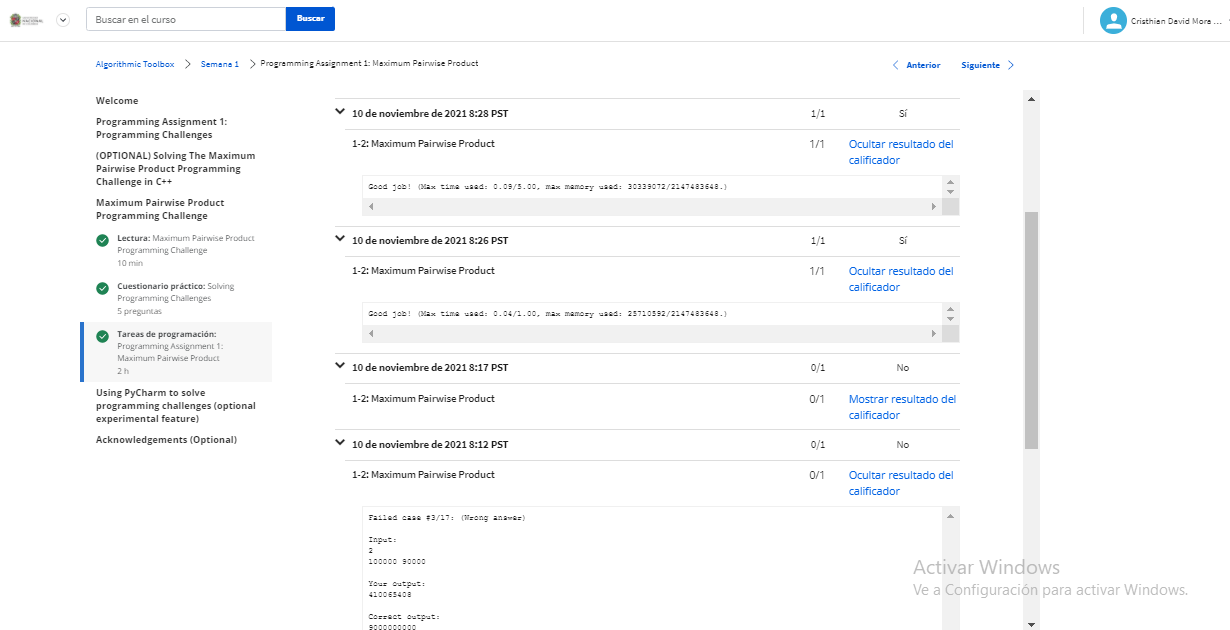

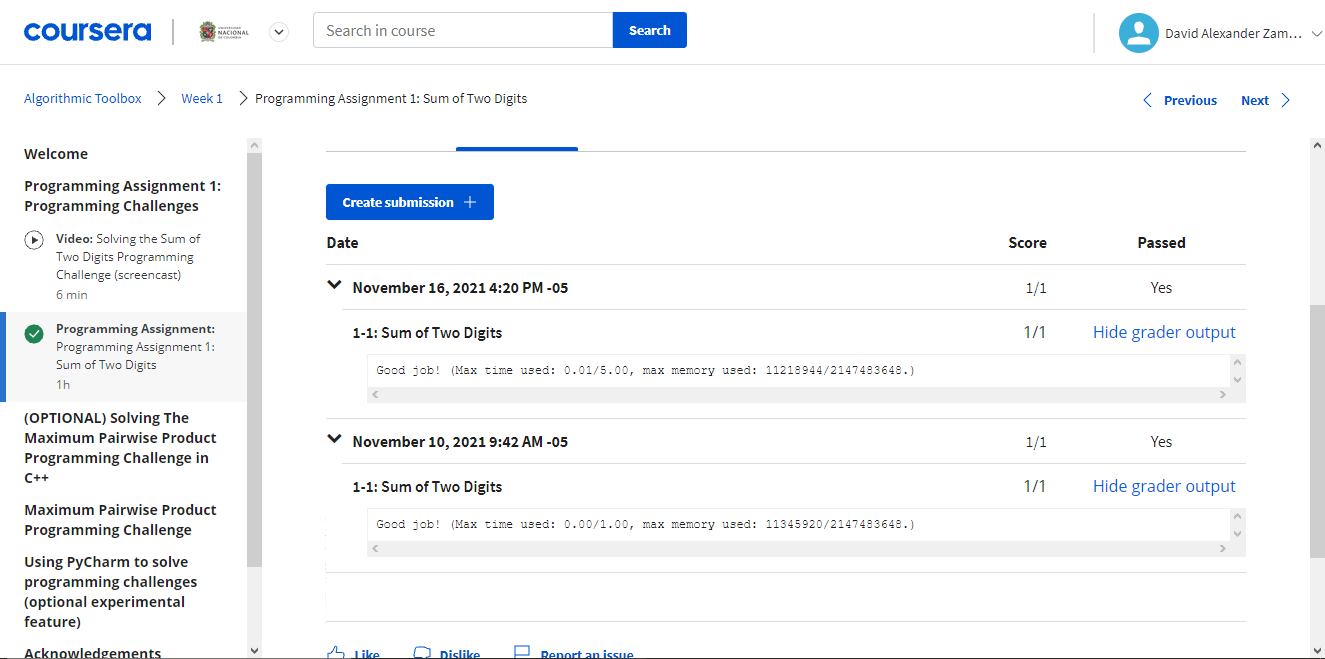

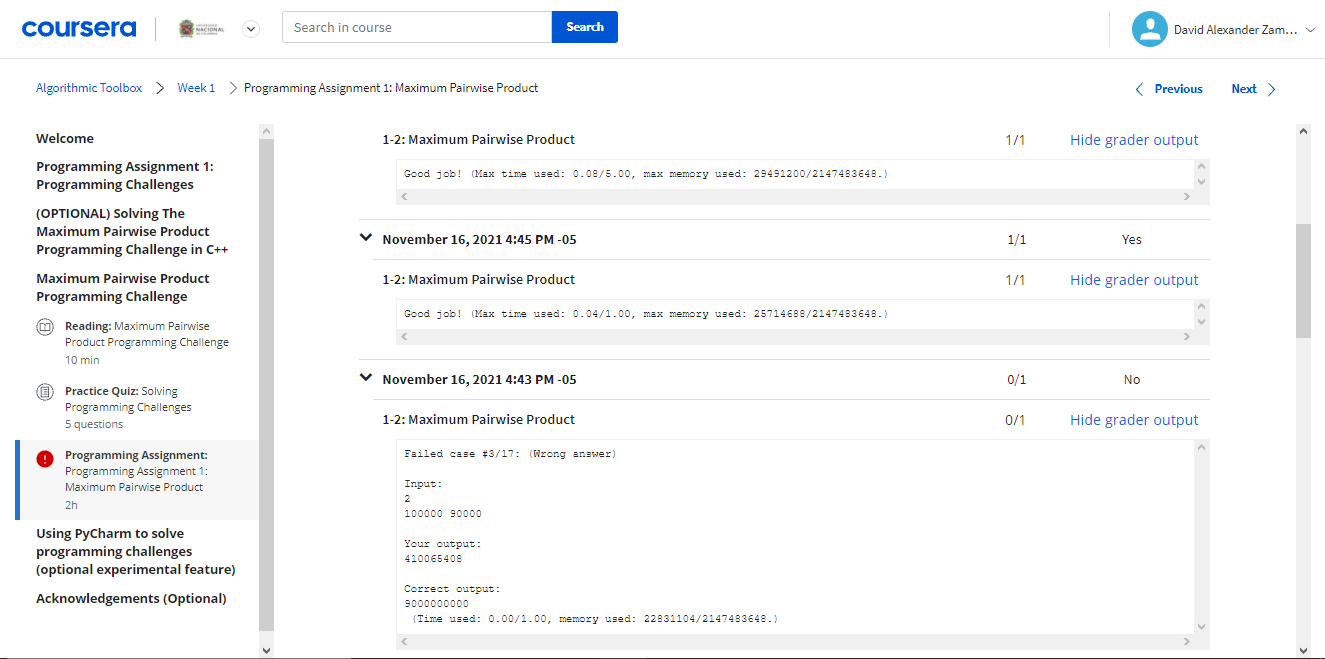

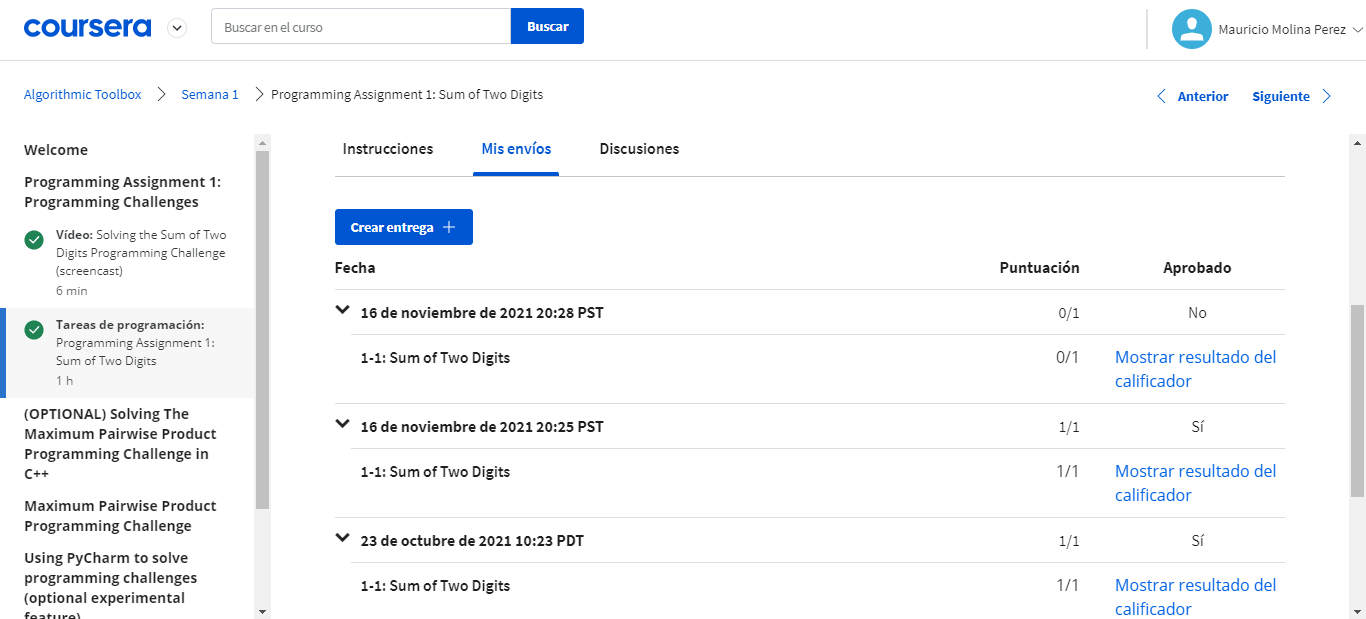

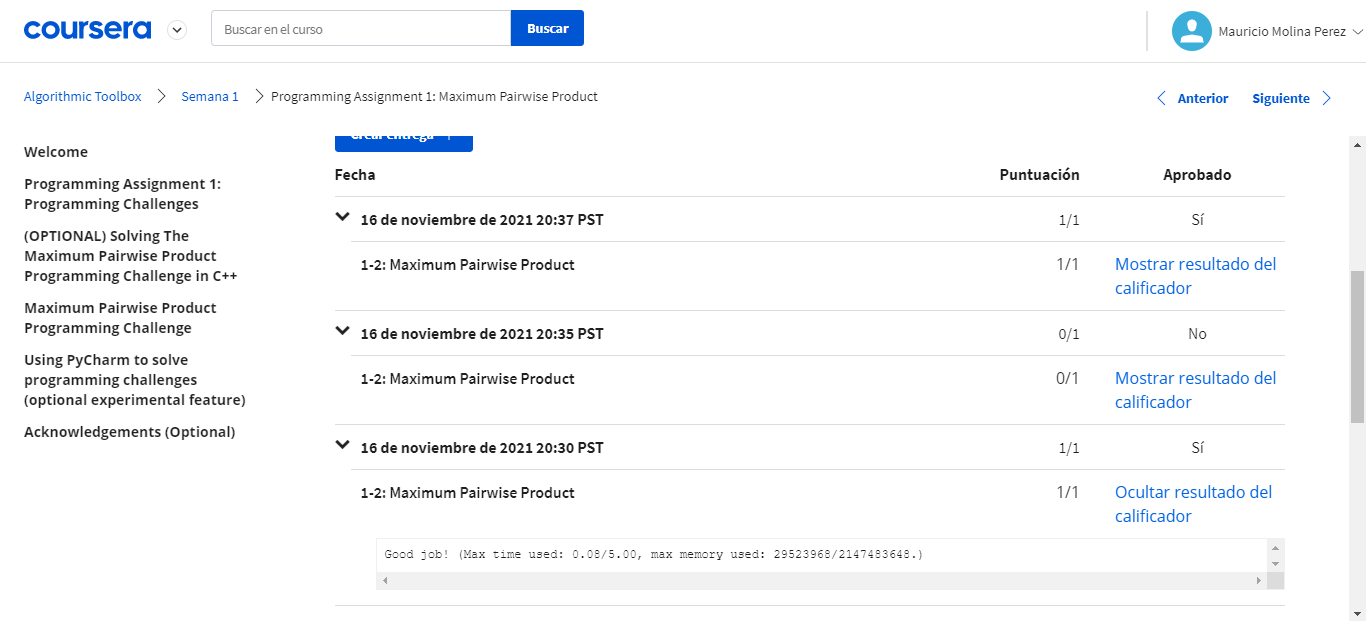